In [0]:
# import keras
# from keras.datasets import cifar10
# from keras.models import Model, Sequential
# from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
# from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# from keras.layers import Concatenate
# from keras.optimizers import Adam

In [2]:
# Load necessary libraries
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from matplotlib import pyplot

Using TensorFlow backend.


In [0]:
# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf

In [0]:
# I will save model to every epochs in drive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [0]:
# !ls /content/gdrive/My\ Drive

In [0]:
# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 10
l = 40
num_filter = 12
compression = 0.5
dropout_rate = 0.2

In [7]:
# Load CIFAR10 Data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
img_height, img_width, channel = X_train.shape[1],X_train.shape[2],X_train.shape[3]

# convert to one hot encoing 
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes) 

170500096/170498071 [==============================] - 6s 0us/step


In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [0]:
# Dense Block
def denseblock(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    temp = input
    for _ in range(l): 
        BatchNorm = layers.BatchNormalization()(temp)
        relu = layers.Activation('relu')(BatchNorm)
        Conv2D_3_3 = layers.Conv2D(int(num_filter*compression), (3,3), use_bias=False ,padding='same')(relu)
        if dropout_rate>0:
            Conv2D_3_3 = layers.Dropout(dropout_rate)(Conv2D_3_3)
        concat = layers.Concatenate(axis=-1)([temp,Conv2D_3_3])
        
        temp = concat
        
    return temp

## transition Blosck
def transition(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = layers.Conv2D(int(num_filter*compression), (1,1), use_bias=False ,padding='same')(relu)
    if dropout_rate>0:
         Conv2D_BottleNeck = layers.Dropout(dropout_rate)(Conv2D_BottleNeck)
    avg = layers.AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)
    return avg

#output layer
def output_layer(input):
    global compression
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    AvgPooling = layers.AveragePooling2D(pool_size=(2,2))(relu)
    flat = layers.Flatten()(AvgPooling)
    output = layers.Dense(num_classes, activation='softmax')(flat)
    return output

In [0]:
num_filter = 12
dropout_rate = 0.2
l = 12
input = layers.Input(shape=(img_height, img_width, channel,))
First_Conv2D = layers.Conv2D(num_filter, (3,3), use_bias=False ,padding='same')(input)

First_Block = denseblock(First_Conv2D, num_filter, dropout_rate)
First_Transition = transition(First_Block, num_filter, dropout_rate)

Second_Block = denseblock(First_Transition, num_filter, dropout_rate)
Second_Transition = transition(Second_Block, num_filter, dropout_rate)

Third_Block = denseblock(Second_Transition, num_filter, dropout_rate)
Third_Transition = transition(Third_Block, num_filter, dropout_rate)

Last_Block = denseblock(Third_Transition,  num_filter, dropout_rate)
output = output_layer(Last_Block)

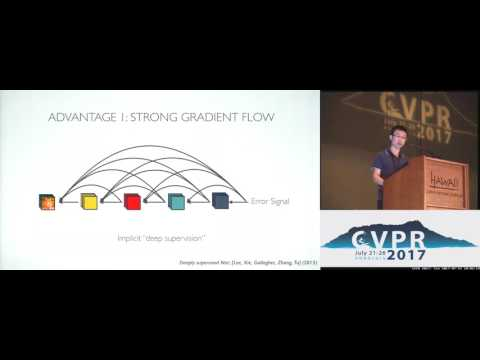

In [10]:
#https://arxiv.org/pdf/1608.06993.pdf
from IPython.display import IFrame, YouTubeVideo
YouTubeVideo(id='-W6y8xnd--U', width=600)

In [11]:
model = Model(inputs=[input], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 12)   324         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 12)   48          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 12)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, 
                    validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 25s 65ms/step - loss: 1.7582 - accuracy: 0.3436 - val_loss: 1.5876 - val_accuracy: 0.4242
Epoch 2/10
391/391 [==============================] - 24s 61ms/step - loss: 1.4103 - accuracy: 0.4789 - val_loss: 1.3950 - val_accuracy: 0.4987
Epoch 3/10
391/391 [==============================] - 24s 61ms/step - loss: 1.2338 - accuracy: 0.5541 - val_loss: 1.6258 - val_accuracy: 0.4904
Epoch 4/10
391/391 [==============================] - 24s 61ms/step - loss: 1.1185 - accuracy: 0.5990 - val_loss: 1.1344 - val_accuracy: 0.6144
Epoch 5/10
391/391 [==============================] - 24s 61ms/step - loss: 1.0438 - accuracy: 0.6258 - val_loss: 1.1873 - val_accuracy: 0.5981
Epoch 6/10
391/391 [==============================] - 24s 61ms/step - loss: 0.9919 - accuracy: 0.6435 - val_loss: 1.0949 - val_accuracy: 0.6294
Epoch 7/10
391/391 [==============================] - 24s 61ms/step - loss: 0.9513 - accuracy: 0.6576 - val_loss: 1.3143 - val_accuracy:

In [14]:
# Test the model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 1.7172 - accuracy: 0.5552
Test loss: 1.7172198295593262
Test accuracy: 0.5551999807357788


In [15]:
# Save the trained weights in to .h5 format
model.save_weights("DNST_model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
# free model variable
del model

# Assignment

1.  Please visit this link to access the state-of-art DenseNet code for reference - DenseNet - cifar10 notebook link
2.  You need to create a copy of this and "retrain" this model to achieve 90+ test accuracy. 
3.  You cannot use Dense Layers (also called fully connected layers), or DropOut.
4.  You MUST use Image Augmentation Techniques.
5.  You cannot use an already trained model as a beginning points, you have to initilize as your own
6.  You cannot run the program for more than 300 Epochs, and it should be clear from your log, that you have only used 300 Epochs
7.  You cannot use test images for training the model.
8.  You cannot change the general architecture of DenseNet (which means you must use Dense Block, Transition and Output blocks as mentioned in the code)
9.  You are free to change Convolution types (e.g. from 3x3 normal convolution to Depthwise Separable, etc)
10. You cannot have more than 1 Million parameters in total
11. You are free to move the code from Keras to Tensorflow, Pytorch, MXNET etc. 
12. You can use any optimization algorithm you need. 
13. You can checkpoint your model and retrain the model from that checkpoint so that no need of training the model from first if you lost at any epoch while training. You can directly load that model and Train from that epoch. 

In [0]:
# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 10
l = 40
num_filter = 12
compression = 0.5
dropout_rate = 0.2

In [0]:
# Load CIFAR10 Data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
img_height, img_width, channel = X_train.shape[1],X_train.shape[2],X_train.shape[3]

# convert to one hot encoing 
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes) 

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
X_test.shape

(10000, 32, 32, 3)

In [14]:
y_train.shape

(50000, 10)

In [15]:
y_test.shape

(10000, 10)

In [0]:
def normalize_pixels(train, test):
    '''
    Normalize data into range of 0 to 1
    '''
    train_norm = train.astype('float32')
    test_norm  = test.astype('float32')
    
    train_norm /= 255
    test_norm /= 255
    
    return (train_norm, test_norm)

In [0]:
X_train,X_test=normalize_pixels(X_train,X_test)

In [18]:
#https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
sample_image=X_train[1]
sample_image.shape

(32, 32, 3)

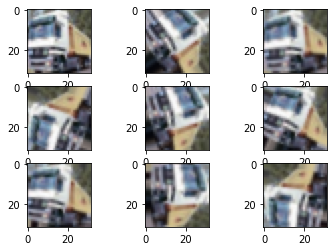

In [19]:
sample_images = expand_dims(sample_image, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(sample_images, batch_size=1)
# generate sample images and plot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    image = batch[0];
    # plot raw pixel data
    pyplot.imshow(image)

# show the figure
pyplot.show()

# 1.1 Model with dense layer

In [0]:
#https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
def model_summarize(history):
    '''
    Summarize model i.e. print train and test loss
    '''
    # plot loss
    pyplot.subplot(121)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.show()

In [0]:
# import pickle

In [0]:
def model_harness(X_train, y_train, X_test, y_test, given_batch_size, given_step_size, given_epochs):
    '''
    define model using data augmentation technique and extend it to it's vertical limit
    '''
    # model = pickle.load('densenet.pkl')
    # create data generator
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    # prepare iterator
    iterator_train = datagen.flow(X_train, y_train, batch_size=given_batch_size)
    # fit model
    steps = int(X_train.shape[0] / given_step_size)
    history = model.fit_generator(iterator_train, steps_per_epoch=steps, epochs=given_epochs, validation_data=(X_test, y_test), verbose=1)
    # evaluate model
    _, acc = model.evaluate(X_test, y_test, verbose=1)
    print('> %.3f' % (acc * 100.0))
    # file = open('/content/gdrive/My Drive/densenet.pkl', 'wb')
    # pickle.dumps(model)#, file
    # learning curves
    model_summarize(history)

In [0]:
def denseblock(input, num_filter = 64, dropout_rate = 0):
    '''
    Create dense block
    '''
    global compression
    temp = input
    for _ in range(l): 
        BatchNorm = layers.BatchNormalization()(temp)
        relu = layers.Activation('relu')(BatchNorm)
        Conv2D_5_5 = layers.Conv2D(int(num_filter*compression), (5,5),kernel_initializer="he_uniform" ,padding='same')(relu)
        if dropout_rate>0:
            Conv2D_5_5 = layers.Dropout(dropout_rate)(Conv2D_5_5)
        concat = layers.Concatenate(axis=-1)([temp,Conv2D_5_5])
        
        temp = concat
        
    return temp

def transition(input, num_filter = 32, dropout_rate = 0):
    '''
    Create transition block
    '''
    global compression
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = layers.Conv2D(int(num_filter*compression), (5,5), kernel_initializer="he_uniform" ,padding='same')(relu)
    if dropout_rate>0:
         Conv2D_BottleNeck = layers.Dropout(dropout_rate)(Conv2D_BottleNeck)
    avg = layers.AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)
    
    return avg

def output_layer(input):
    '''
    define output layer
    '''
    global compression
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    AvgPooling = layers.AveragePooling2D(pool_size=(2,2))(relu)
    flat = layers.Flatten()(AvgPooling)
    output = layers.Dense(num_classes, activation='softmax')(flat)
    
    return output

In [0]:
num_filter = 10
dropout_rate = 0
l = 12
input = layers.Input(shape=(img_height, img_width, channel))
First_Conv2D = layers.Conv2D(num_filter, (5,5), use_bias=False ,padding='same')(input)
BatchNorm = layers.BatchNormalization()(First_Conv2D)

First_Block = denseblock(BatchNorm,32, dropout_rate)
First_Transition = transition(First_Block, num_filter, dropout_rate)

Second_Block = denseblock(First_Transition, 16, dropout_rate)
Second_Transition = transition(Second_Block, num_filter, dropout_rate)

Third_Block = denseblock(Second_Transition, num_filter, dropout_rate)
Third_Transition = transition(Third_Block, num_filter, dropout_rate)

Last_Block = denseblock(Third_Transition,  num_filter, dropout_rate)
output = output_layer(Last_Block)

In [31]:
model = Model(inputs=[input], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_52 (Conv2D)              (None, 32, 32, 10)   750         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_52 (BatchNo (None, 32, 32, 10)   40          conv2d_52[0][0]                  
__________________________________________________________________________________________________
batch_normalization_53 (BatchNo (None, 32, 32, 10)   40          batch_normalization_52[0][0]     
____________________________________________________________________________________________

In [0]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
781/781 [==============================] - 83s 107ms/step - loss: 1.6684 - accuracy: 0.3792 - val_loss: 1.4304 - val_accuracy: 0.4914
Epoch 2/75
781/781 [==============================] - 82s 105ms/step - loss: 1.3260 - accuracy: 0.5175 - val_loss: 1.3210 - val_accuracy: 0.5277
Epoch 3/75
781/781 [==============================] - 82s 105ms/step - loss: 1.1522 - accuracy: 0.5854 - val_loss: 1.3607 - val_accuracy: 0.5235
Epoch 4/75
781/781 [==============================] - 84s 107ms/step - loss: 1.0313 - accuracy: 0.6312 - val_loss: 1.0919 - val_accuracy: 0.6118
Epoch 5/75
781/781 [==============================] - 84s 107ms/step - loss: 0.9370 - accuracy: 0.6667 - val_loss: 0.9598 - val_accuracy: 0.6625
Epoch 6/75
781/781 [==============================] - 84s 107ms/step - loss: 0.8641 - accuracy: 0.6973 - val_loss: 1.3034 - val_accuracy: 0.5862
Epoch 7/75
781/781 [==============================] - 

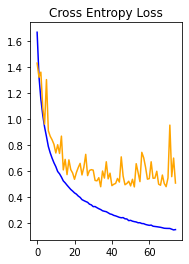

In [0]:
# entry point, run the test harness
model_harness(X_train, y_train, X_test, y_test, 64, 64, 75)

In [0]:
# Save the trained weights in to .h5 format
model.save_weights("DNST_model_with_dense_layer.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
# free model variable
del model

# 1.2 Model without Dense layer and implemented all tweaks mentioned in the assignment task

In [0]:
def denseblock(input, num_filter = 12, dropout_rate = 0.2):
    '''
    Create Dense Block
    '''
    global compression
    temp = input
    for _ in range(l): 
        
        BatchNorm = layers.BatchNormalization()(temp)
        relu = layers.Activation('relu')(BatchNorm)
        
        Conv2D_5_5 = layers.Conv2D(int(num_filter*compression), (5,5), use_bias=False ,padding='same')(relu)
        
        if dropout_rate>0:
            Conv2D_5_5 = layers.Dropout(dropout_rate)(Conv2D_5_5)
            
        concat = layers.Concatenate(axis=-1)([temp,Conv2D_5_5])
        
        temp = concat
        
    return temp

def transition(input, num_filter = 12, dropout_rate = 0.2):
    '''
    Create transition block
    '''
    global compression
    
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    
    Conv2D_BottleNeck = layers.Conv2D(int(num_filter*compression), (5,5), use_bias=False ,padding='same')(relu)
    
    if dropout_rate>0:
         Conv2D_BottleNeck = layers.Dropout(dropout_rate)(Conv2D_BottleNeck)
            
    avg = layers.AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)
    
    return avg

def output_layer(input):
    '''
    Define output layer
    '''
    global compression
    
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    AvgPooling = layers. MaxPooling2D(pool_size=(2,2))(relu)
    
    output = layers.Conv2D(filters=10,kernel_size=(2,2),activation='softmax')(AvgPooling)
   
    flat = layers.Flatten()(output)
    
    return flat

In [0]:
num_filter = 12
dropout_rate = 0
l = 12
input = layers.Input(shape=(img_height, img_width, channel,))
First_Conv2D = layers.Conv2D(32, (3,3), use_bias=False ,padding='same')(input)

First_Block = denseblock(First_Conv2D,10, dropout_rate)
First_Transition = transition(First_Block, 64, dropout_rate)

Second_Block = denseblock(First_Transition, 10, dropout_rate)
Second_Transition = transition(Second_Block, 32, dropout_rate)

Third_Block = denseblock(Second_Transition, num_filter, dropout_rate)
Third_Transition = transition(Third_Block, 32, dropout_rate)

Last_Block = denseblock(Third_Transition,  num_filter, dropout_rate)
output = output_layer(Last_Block)

In [27]:
model = Model(inputs=[input], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_52 (Conv2D)              (None, 32, 32, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_53 (BatchNo (None, 32, 32, 32)   128         conv2d_52[0][0]                  
__________________________________________________________________________________________________
activation_52 (Activation)      (None, 32, 32, 32)   0           batch_normalization_53[0][0]     
______________________________________________________________________________________________

In [0]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Instructions for updating:
Please use Model.fit, which supports generators.
313/313 [==============================] - 5s 16ms/step - loss: 2.2045 - accuracy: 0.4037
> 40.370


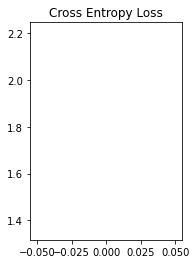

In [29]:
# sample run
model_harness(X_train, y_train, X_test, y_test, 60, 39, 1)

In [30]:
# entry point, run the test harness for 50 * 5 iterations, 1st slot
model_harness(X_train, y_train, X_test, y_test, 60, 39, 50)

Epoch 1/50
1282/1282 [==============================] - 122s 95ms/step - loss: 0.8660 - accuracy: 0.6932 - val_loss: 1.0409 - val_accuracy: 0.6576
Epoch 2/50
1282/1282 [==============================] - 123s 96ms/step - loss: 0.6867 - accuracy: 0.7593 - val_loss: 1.0192 - val_accuracy: 0.6963
Epoch 3/50
1282/1282 [==============================] - 122s 95ms/step - loss: 0.5855 - accuracy: 0.7983 - val_loss: 0.7289 - val_accuracy: 0.7644
Epoch 4/50
1282/1282 [==============================] - 122s 95ms/step - loss: 0.5207 - accuracy: 0.8198 - val_loss: 0.7642 - val_accuracy: 0.7520
Epoch 5/50
1282/1282 [==============================] - 122s 95ms/step - loss: 0.4703 - accuracy: 0.8362 - val_loss: 0.8759 - val_accuracy: 0.7475
Epoch 6/50
1282/1282 [==============================] - 122s 95ms/step - loss: 0.4331 - accuracy: 0.8500 - val_loss: 0.5181 - val_accuracy: 0.8315
Epoch 7/50
1282/1282 [==============================] - 122s 95ms/step - loss: 0.3976 - accuracy: 0.8632 - val_loss: 0

Epoch 1/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0862 - accuracy: 0.9690 - val_loss: 0.5547 - val_accuracy: 0.8716
Epoch 2/25
1282/1282 [==============================] - 121s 95ms/step - loss: 0.0872 - accuracy: 0.9692 - val_loss: 0.5588 - val_accuracy: 0.8696
Epoch 3/25
1282/1282 [==============================] - 121s 95ms/step - loss: 0.0818 - accuracy: 0.9715 - val_loss: 0.5206 - val_accuracy: 0.8823
Epoch 4/25
1282/1282 [==============================] - 121s 95ms/step - loss: 0.0854 - accuracy: 0.9698 - val_loss: 0.5070 - val_accuracy: 0.8804
Epoch 5/25
1282/1282 [==============================] - 121s 95ms/step - loss: 0.0776 - accuracy: 0.9723 - val_loss: 0.5580 - val_accuracy: 0.8731
Epoch 6/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0812 - accuracy: 0.9714 - val_loss: 0.6004 - val_accuracy: 0.8623
Epoch 7/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0774 - accuracy: 0.9727 - val_loss: 0

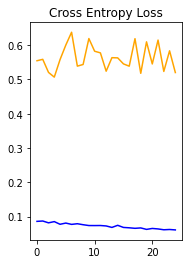

In [31]:
# entry point, run the test harness for 25 * 8 iterations, 2nd slot
model_harness(X_train, y_train, X_test, y_test, 60, 39, 25)

Epoch 1/25
1282/1282 [==============================] - 120s 94ms/step - loss: 0.0615 - accuracy: 0.9785 - val_loss: 0.5160 - val_accuracy: 0.8866
Epoch 2/25
1282/1282 [==============================] - 120s 94ms/step - loss: 0.0589 - accuracy: 0.9795 - val_loss: 0.5773 - val_accuracy: 0.8808
Epoch 3/25
1282/1282 [==============================] - 121s 95ms/step - loss: 0.0590 - accuracy: 0.9792 - val_loss: 0.5458 - val_accuracy: 0.8872
Epoch 4/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0590 - accuracy: 0.9787 - val_loss: 0.6247 - val_accuracy: 0.8708
Epoch 5/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0579 - accuracy: 0.9794 - val_loss: 0.6266 - val_accuracy: 0.8707
Epoch 6/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0569 - accuracy: 0.9798 - val_loss: 0.5833 - val_accuracy: 0.8807
Epoch 7/25
1282/1282 [==============================] - 121s 95ms/step - loss: 0.0593 - accuracy: 0.9789 - val_loss: 0

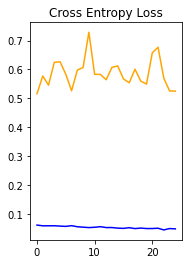

In [32]:
# entry point, run the test harness for 25 * 8 iterations, 3rd slot
model_harness(X_train, y_train, X_test, y_test, 60, 39, 25)

Epoch 1/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0470 - accuracy: 0.9830 - val_loss: 0.6054 - val_accuracy: 0.8792
Epoch 2/25
1282/1282 [==============================] - 121s 95ms/step - loss: 0.0469 - accuracy: 0.9839 - val_loss: 0.5582 - val_accuracy: 0.8873
Epoch 3/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0456 - accuracy: 0.9838 - val_loss: 0.5284 - val_accuracy: 0.8914
Epoch 4/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0457 - accuracy: 0.9837 - val_loss: 0.6097 - val_accuracy: 0.8796
Epoch 5/25
1282/1282 [==============================] - 120s 94ms/step - loss: 0.0422 - accuracy: 0.9850 - val_loss: 0.5924 - val_accuracy: 0.8871
Epoch 6/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0474 - accuracy: 0.9836 - val_loss: 0.5490 - val_accuracy: 0.8897
Epoch 7/25
1282/1282 [==============================] - 121s 95ms/step - loss: 0.0458 - accuracy: 0.9841 - val_loss: 0

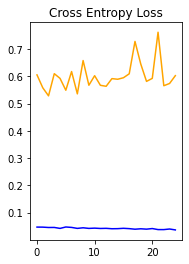

In [33]:
# entry point, run the test harness for 25 * 8 iterations, 4th slot
model_harness(X_train, y_train, X_test, y_test, 60, 39, 25)

Epoch 1/25
1282/1282 [==============================] - 123s 96ms/step - loss: 0.0383 - accuracy: 0.9865 - val_loss: 0.6244 - val_accuracy: 0.8817
Epoch 2/25
1282/1282 [==============================] - 123s 96ms/step - loss: 0.0357 - accuracy: 0.9873 - val_loss: 0.5762 - val_accuracy: 0.8912
Epoch 3/25
1282/1282 [==============================] - 123s 96ms/step - loss: 0.0382 - accuracy: 0.9864 - val_loss: 0.6020 - val_accuracy: 0.8875
Epoch 4/25
1282/1282 [==============================] - 123s 96ms/step - loss: 0.0387 - accuracy: 0.9866 - val_loss: 0.6606 - val_accuracy: 0.8794
Epoch 5/25
1282/1282 [==============================] - 123s 96ms/step - loss: 0.0374 - accuracy: 0.9870 - val_loss: 0.6488 - val_accuracy: 0.8820
Epoch 6/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0356 - accuracy: 0.9875 - val_loss: 0.5999 - val_accuracy: 0.8901
Epoch 7/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0368 - accuracy: 0.9870 - val_loss: 0

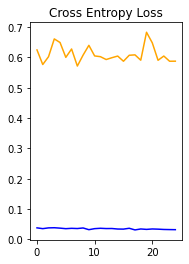

In [34]:
# entry point, run the test harness for 25 * 8 iterations, 5th slot
model_harness(X_train, y_train, X_test, y_test, 60, 39, 25)

Epoch 1/25
1282/1282 [==============================] - 123s 96ms/step - loss: 0.0309 - accuracy: 0.9892 - val_loss: 0.6036 - val_accuracy: 0.8879
Epoch 2/25
1282/1282 [==============================] - 123s 96ms/step - loss: 0.0327 - accuracy: 0.9885 - val_loss: 0.5816 - val_accuracy: 0.8914
Epoch 3/25
1282/1282 [==============================] - 122s 96ms/step - loss: 0.0313 - accuracy: 0.9895 - val_loss: 0.5437 - val_accuracy: 0.9013
Epoch 4/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0320 - accuracy: 0.9887 - val_loss: 0.5891 - val_accuracy: 0.8911
Epoch 5/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0322 - accuracy: 0.9888 - val_loss: 0.6661 - val_accuracy: 0.8830
Epoch 6/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0303 - accuracy: 0.9898 - val_loss: 0.6304 - val_accuracy: 0.8880
Epoch 7/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0351 - accuracy: 0.9879 - val_loss: 0

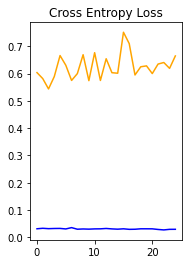

In [35]:
# entry point, run the test harness for 25 * 8 iterations, 6th slot
model_harness(X_train, y_train, X_test, y_test, 60, 39, 25)

Epoch 1/25
1282/1282 [==============================] - 121s 95ms/step - loss: 0.0280 - accuracy: 0.9900 - val_loss: 0.6893 - val_accuracy: 0.8854
Epoch 2/25
1282/1282 [==============================] - 121s 95ms/step - loss: 0.0294 - accuracy: 0.9895 - val_loss: 0.6329 - val_accuracy: 0.8846
Epoch 3/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0279 - accuracy: 0.9903 - val_loss: 0.6261 - val_accuracy: 0.8937
Epoch 4/25
1282/1282 [==============================] - 123s 96ms/step - loss: 0.0274 - accuracy: 0.9909 - val_loss: 0.5996 - val_accuracy: 0.8953
Epoch 5/25
1282/1282 [==============================] - 123s 96ms/step - loss: 0.0289 - accuracy: 0.9901 - val_loss: 0.6283 - val_accuracy: 0.8869
Epoch 6/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0293 - accuracy: 0.9900 - val_loss: 0.5977 - val_accuracy: 0.8935
Epoch 7/25
1282/1282 [==============================] - 121s 95ms/step - loss: 0.0287 - accuracy: 0.9904 - val_loss: 0

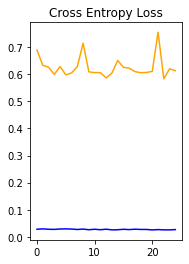

In [36]:
# entry point, run the test harness for 25 * 8 iterations, 7th slot
model_harness(X_train, y_train, X_test, y_test, 60, 39, 25)

Epoch 1/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0243 - accuracy: 0.9915 - val_loss: 0.6682 - val_accuracy: 0.8857
Epoch 2/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0255 - accuracy: 0.9911 - val_loss: 0.6053 - val_accuracy: 0.8943
Epoch 3/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0242 - accuracy: 0.9914 - val_loss: 0.6644 - val_accuracy: 0.8916
Epoch 4/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0243 - accuracy: 0.9915 - val_loss: 0.6988 - val_accuracy: 0.8882
Epoch 5/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0248 - accuracy: 0.9918 - val_loss: 0.6393 - val_accuracy: 0.8927
Epoch 6/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0245 - accuracy: 0.9914 - val_loss: 0.6389 - val_accuracy: 0.8947
Epoch 7/25
1282/1282 [==============================] - 122s 95ms/step - loss: 0.0245 - accuracy: 0.9913 - val_loss: 0

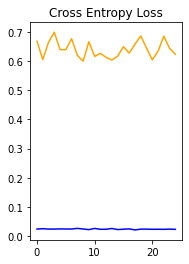

In [37]:
# entry point, run the test harness for 25 * 8 iterations, 8th slot
model_harness(X_train, y_train, X_test, y_test, 60, 39, 25)

In [38]:
# Save the trained weights in to .h5 format
model.save_weights("DNST_model_without_dense_layer.h5")
print("Saved model to disk")

Saved model to disk


# You can checkpoint your model and retrain the model from that checkpoint so that no need of training the model from first if you lost at any epoch while training. You can directly load that model and Train from that epoch

Epoch 1/25
1282/1282 [==============================] - 117s 92ms/step - loss: 0.0218 - accuracy: 0.9923 - val_loss: 0.6264 - val_accuracy: 0.8953
Epoch 2/25
1282/1282 [==============================] - 120s 93ms/step - loss: 0.0226 - accuracy: 0.9921 - val_loss: 0.6088 - val_accuracy: 0.8963
Epoch 3/25
1282/1282 [==============================] - 120s 94ms/step - loss: 0.0233 - accuracy: 0.9921 - val_loss: 0.6136 - val_accuracy: 0.8960
Epoch 4/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0250 - accuracy: 0.9912 - val_loss: 0.6241 - val_accuracy: 0.8925
Epoch 5/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0206 - accuracy: 0.9925 - val_loss: 0.7215 - val_accuracy: 0.8810
Epoch 6/25
1282/1282 [==============================] - 121s 95ms/step - loss: 0.0222 - accuracy: 0.9919 - val_loss: 0.6209 - val_accuracy: 0.8916
Epoch 7/25
1282/1282 [==============================] - 121s 95ms/step - loss: 0.0220 - accuracy: 0.9925 - val_loss: 0

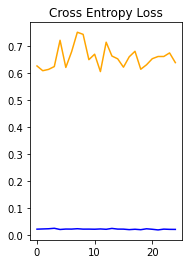

In [39]:
# entry point, run the test harness
model_harness(X_train, y_train, X_test, y_test, 60, 39, 25)

Epoch 1/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0218 - accuracy: 0.9925 - val_loss: 0.6757 - val_accuracy: 0.8907
Epoch 2/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0195 - accuracy: 0.9934 - val_loss: 0.6745 - val_accuracy: 0.8895
Epoch 3/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0197 - accuracy: 0.9929 - val_loss: 0.6257 - val_accuracy: 0.8967
Epoch 4/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0213 - accuracy: 0.9925 - val_loss: 0.6570 - val_accuracy: 0.8946
Epoch 5/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0231 - accuracy: 0.9919 - val_loss: 0.6668 - val_accuracy: 0.8933
Epoch 6/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0214 - accuracy: 0.9928 - val_loss: 0.6113 - val_accuracy: 0.8952
Epoch 7/25
1282/1282 [==============================] - 121s 94ms/step - loss: 0.0214 - accuracy: 0.9929 - val_loss: 0

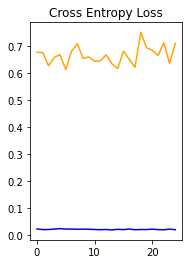

In [40]:
# entry point, run the test harness
model_harness(X_train, y_train, X_test, y_test, 60, 39, 25)

# Summarize the model output

In [1]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['Model', 'Epochs', 'Train Accuracy', 'Test Accuracy']
table.add_row(['With dense layer ', 75, 0.9478, 0.8603])
table.add_row(['Without dense layer', '300', 0.9936,  0.8873])

print(table)

+---------------------+--------+----------------+---------------+
|        Model        | Epochs | Train Accuracy | Test Accuracy |
+---------------------+--------+----------------+---------------+
|  With dense layer   |   75   |     0.9478     |     0.8603    |
| Without dense layer |  300   |     0.9936     |     0.8873    |
+---------------------+--------+----------------+---------------+
